In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_parquet("/media/pankhuri/MData/safe_dataset.sample/sample/part-00000-34d9b361-ea79-42eb-82ee-9c9f9259c339-c000.snappy.parquet", engine='pyarrow')

In [3]:
df.head()

argument_0 argument_1 argument_2 argument_3 argument_4 argument_5  \
0                                                                     
1                                                                     
2                                                                     
3                                                                     
4                                                                     

  argument_6 argument_7 argument_8 arguments  ...    script_line  \
0                                         {}  ...             57   
1                                         {}  ...             57   
2                                         {}  ...             57   
3                                         {}  ...             49   
4                                         {}  ...             25   

  script_loc_eval                                         script_url  \
0                  https://staticxx.facebook.com/connect/xd_arbit...   
1                  https://staticxx.facebook.com/connect/xd_arbit...   
2                  https://staticxx.facebook.com/connect/xd_arbit...   
3                  https://staticxx.facebook.com/connect/xd_arbit...   
4                  https://ajax.googleapis.com/ajax/libs/webfont/...   

                       symbol              time_stamp  \
0                 window.name 2017-12-16 02:54:10.079   
1                 window.name 2017-12-16 02:54:10.080   
2      window.document.cookie 2017-12-16 02:54:10.086   
3  window.navigator.userAgent 2017-12-16 02:54:10.088   
4  window.navigator.userAgent 2017-12-16 07:12:07.104   

                                               value  \
0                                 fb_xdm_frame_https   
1                                 fb_xdm_frame_https   
2                                                      
3  Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...   
4  Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...   

                                          value_1000 value_len valid errors  
0                                 fb_xdm_frame_https        18  True         
1                                 fb_xdm_frame_https        18  True         
2                                                            0  True         
3  Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...        68  True         
4  Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...        68  True         

[5 rows x 30 columns]

## Initial Analysis

To more easily see the column names and kind of values they hold, transpose of the head is taken

In [4]:
sample_cols=df.T

In [5]:
sample_cols

0     \
argument_0                                                            
argument_1                                                            
argument_2                                                            
argument_3                                                            
argument_4                                                            
argument_5                                                            
argument_6                                                            
argument_7                                                            
argument_8                                                            
arguments                                                        {}   
arguments_n_keys                                                  0   
call_id           1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...   
call_stack                                                            
crawl_id                                                          1   
file_name         1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...   
func_name                                                       a/<   
in_iframe                                                      True   
location          https://staticxx.facebook.com/connect/xd_arbit...   
operation                                                       get   
script_col                                                     1802   
script_line                                                      57   
script_loc_eval                                                       
script_url        https://staticxx.facebook.com/connect/xd_arbit...   
symbol                                                  window.name   
time_stamp                               2017-12-16 02:54:10.079000   
value                                            fb_xdm_frame_https   
value_1000                                       fb_xdm_frame_https   
value_len                                                        18   
valid                                                          True   
errors                                                                

                                                               1     \
argument_0                                                            
argument_1                                                            
argument_2                                                            
argument_3                                                            
argument_4                                                            
argument_5                                                            
argument_6                                                            
argument_7                                                            
argument_8                                                            
arguments                                                        {}   
arguments_n_keys                                                  0   
call_id           1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...   
call_stack                                                            
crawl_id                                                          1   
file_name         1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...   
func_name                                                       a/<   
in_iframe                                                      True   
location          https://staticxx.facebook.com/connect/xd_arbit...   
operation                                                       get   
script_col                                                     2895   
script_line                                                      57   
script_loc_eval                                                       
script_url        https://staticxx.facebook.com/connect/xd_arbit...   
symbol                                                  window.name   
time_stamp                               2017-12-16 02:54:10.080000   
value          

In [6]:
df.dtypes

argument_0                  object
argument_1                  object
argument_2                  object
argument_3                  object
argument_4                  object
argument_5                  object
argument_6                  object
argument_7                  object
argument_8                  object
arguments                   object
arguments_n_keys             int64
call_id                     object
call_stack                  object
crawl_id                     int64
file_name                   object
func_name                   object
in_iframe                     bool
location                    object
operation                   object
script_col                  object
script_line                 object
script_loc_eval             object
script_url                  object
symbol                      object
time_stamp          datetime64[ns]
value                       object
value_1000                  object
value_len                    int32
valid               

In [7]:
df.columns

Index(['argument_0', 'argument_1', 'argument_2', 'argument_3', 'argument_4',
       'argument_5', 'argument_6', 'argument_7', 'argument_8', 'arguments',
       'arguments_n_keys', 'call_id', 'call_stack', 'crawl_id', 'file_name',
       'func_name', 'in_iframe', 'location', 'operation', 'script_col',
       'script_line', 'script_loc_eval', 'script_url', 'symbol', 'time_stamp',
       'value', 'value_1000', 'value_len', 'valid', 'errors'],
      dtype='object')

In [8]:
df.describe()

arguments_n_keys  crawl_id      value_len
count       9234.000000    9234.0    9234.000000
mean           0.259368       1.0     347.945636
std            0.730412       0.0    2529.274714
min            0.000000       1.0       0.000000
25%            0.000000       1.0       2.000000
50%            0.000000       1.0      68.000000
75%            0.000000       1.0     139.000000
max            6.000000       1.0  103878.000000

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
df['location'].head(20)

0     https://staticxx.facebook.com/connect/xd_arbit...
1     https://staticxx.facebook.com/connect/xd_arbit...
2     https://staticxx.facebook.com/connect/xd_arbit...
3     https://staticxx.facebook.com/connect/xd_arbit...
4     https://cas.us.criteo.com/delivery/r/afr.php?d...
5     http://pos.baidu.com/rcwm?rdid=2835655&dc=3&di...
6     https://staticxx.facebook.com/connect/xd_arbit...
7     https://staticxx.facebook.com/connect/xd_arbit...
8     https://staticxx.facebook.com/connect/xd_arbit...
9     https://staticxx.facebook.com/connect/xd_arbit...
10             https://www.jumia.co.ke/shipping_policy/
11             https://www.jumia.co.ke/shipping_policy/
12             https://www.jumia.co.ke/shipping_policy/
13                      https://www.syracuse.edu/about/
14                      https://www.syracuse.edu/about/
15                      https://www.syracuse.edu/about/
16                      https://www.syracuse.edu/about/
17                      https://www.syracuse.edu

In [11]:
import tldextract

def extract_domain(url):
    """Use tldextract to return the base domain from a url"""
    try:
        extracted = tldextract.extract(url)
        return '{}.{}'.format(extracted.domain, extracted.suffix)
    except Exception as e:
        return 'ERROR'

In [12]:
df['location_domain'] = df.location.apply(extract_domain)
df['script_domain'] = df.script_url.apply(extract_domain)

In [13]:
df.head(5)

argument_0 argument_1 argument_2 argument_3 argument_4 argument_5  \
0                                                                     
1                                                                     
2                                                                     
3                                                                     
4                                                                     

  argument_6 argument_7 argument_8 arguments       ...        \
0                                         {}       ...         
1                                         {}       ...         
2                                         {}       ...         
3                                         {}       ...         
4                                         {}       ...         

                                          script_url  \
0  https://staticxx.facebook.com/connect/xd_arbit...   
1  https://staticxx.facebook.com/connect/xd_arbit...   
2  https://staticxx.facebook.com/connect/xd_arbit...   
3  https://staticxx.facebook.com/connect/xd_arbit...   
4  https://ajax.googleapis.com/ajax/libs/webfont/...   

                       symbol              time_stamp  \
0                 window.name 2017-12-16 02:54:10.079   
1                 window.name 2017-12-16 02:54:10.080   
2      window.document.cookie 2017-12-16 02:54:10.086   
3  window.navigator.userAgent 2017-12-16 02:54:10.088   
4  window.navigator.userAgent 2017-12-16 07:12:07.104   

                                               value  \
0                                 fb_xdm_frame_https   
1                                 fb_xdm_frame_https   
2                                                      
3  Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...   
4  Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...   

                                          value_1000 value_len  valid errors  \
0                                 fb_xdm_frame_https        18   True          
1                                 fb_xdm_frame_https        18   True          
2                                                            0   True          
3  Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...        68   True          
4  Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...        68   True          

  location_domain   script_domain  
0    facebook.com    facebook.com  
1    facebook.com    facebook.com  
2    facebook.com    facebook.com  
3    facebook.com    facebook.com  
4      criteo.com  googleapis.com  

[5 rows x 32 columns]

In [14]:
df['argument_0'].describe()

count     9234
unique     445
top           
freq      7686
Name: argument_0, dtype: object

In [15]:
df.argument_1.unique()

array(['', 'None', '0', 'True',
       '{"cdn3":{"location":{"city":"MOUNTAINVIEW","continent":"NA","country":"US","region":"CA"},"ip":"35.225.102.11"}}',
       'modernizr',
       '["?e=pv&url=http%3A%2F%2Fwww.ufc.ca%2Fmedia%2FSubmission-of-the-Week-Mickey-Gall-vs-Mike-Jackson&page=Submission%20of%20the%20Week%3A%20Mickey%20Gall%20vs%20Mike%20Jackson%20%7C%20UFC%20%C2%AE%20-%20Media&tv=js-2.5.3&tna=co&aid=ufc.com&p=web&tz=UTC&lang=en-US&cs=UTF-8&f_pdf=0&f_qt=0&f_realp=0&f_wma=0&f_dir=0&f_fla=1&f_java=0&f_gears=0&f_ag=0&res=1366x768&cd=24&cookie=1&eid=23ba141b-58aa-46f5-b404-be254a2cff22&dtm=1513383434013&vp=1229x620&ds=1216x1000&vid=1&sid=0ef8f588-52aa-47ed-bfb3-413ca38db0c2&duid=9629fb75b20d0f99&fp=3214062962&cx=eyJzY2hlbWEiOiJpZ2x1OmNvbS5zbm93cGxvd2FuYWx5dGljcy5zbm93cGxvdy9jb250ZXh0cy9qc29uc2NoZW1hLzEtMC0wIiwiZGF0YSI6W3sic2NoZW1hIjoiaWdsdTpjb20uc25vd3Bsb3dhbmFseXRpY3Muc25vd3Bsb3cvd2ViX3BhZ2UvanNvbnNjaGVtYS8xLTAtMCIsImRhdGEiOnsiaWQiOiJlNjhiZDIyOS1iMDg5LTRhMTItOWJmMi03YTRjYTIzZTc3ODk

In [16]:
df.argument_2.unique()

array(['', '0', '157', '14', '25', '184', '135', '69', '74', '138', '188',
       '180', '23', '133', '128', '116', '67', '82', '174', '78', '9',
       '61', '121', '106', '15', '39', '165', '62', '17', '2', '30', '20',
       '10', '8', '1', '116.3467320529744', '39.55588489770889',
       '162.9256275948137', '186.1316818278283', '65.2983826585114',
       '114.72445017285645', '189.87094786856323', '193.41985096782446',
       '10.314800357446074', '7.880851300433278', '18.071448197588325',
       '117.69094513729215', '182.32098844926804', '114.55857530469075',
       'None', '{"domain":"backcountry.com","expire":0}',
       '{"domain":"backcountry.com"}',
       '{"domain":"backcountry.com","expire":365}', 'FUNCTION'],
      dtype=object)

In [17]:
df.argument_3.unique()

array(['', '4', '-65', '-244', '-193', '-201', '-165', '-39', '-74',
       '-170', '-72', '-172', '-69', '-189', '-157', '-122', '35', '-52',
       '-49', '-89', '-121', '-204', '20', '10', '30', '15', '1',
       '166.6953151114285', '0', '157.66953281126916',
       '42.607594188302755', '93.84372066706419', '143.6184089165181',
       '197.75180481374264', '187.30061198584735', '141.0011308733374',
       '55.800757091492414', '158.7808130774647', '193.59733695164323',
       '107.33789433725178', '108.51749181747437', '57.38146863877773',
       '84.56234405748546', '96.81937000714242', '155.8480861596763',
       '141.01022300310433'], dtype=object)

In [18]:
df.argument_4.unique()

array(['', '104', '14', '105', '187', '69', '140', '188', '101', '133',
       '92', '67', '108', '174', '26', '6', '90', '121', '88', '15',
       '170', '36.44534684717655', '6.283185307179586',
       '33.93277465365827', '45.10388793423772', '1.5187546610832214',
       '74.19190420769155', '20.533224707469344', '86.71133099123836',
       '123.11494695022702', '187.47618519701064', '175.85995625704527',
       '79.43848483264446', '110.03469391725957', '194.3657205440104',
       '32.03057209029794', '107.93095245026052', '18.408052576705813',
       '61.02013890631497', '64.86522327177227'], dtype=object)

In [19]:
df.argument_5.unique()

array(['', '4', '-120', '-244', '-151', '-201', '-116', '-39', '-87',
       '-179', '-147', '-73', '-22', '-62', '-65', '-95', '-170', '-188',
       '400', '93.68714243173599', '86.54646566137671',
       '135.3440408129245', '189.48649396188557', '121.3908364996314',
       '77.78915576636791'], dtype=object)

In [20]:
df.argument_6.unique()

array([''], dtype=object)

In [21]:
df.argument_7.unique()

array([''], dtype=object)

In [22]:
df.argument_8.unique()

array([''], dtype=object)

In [23]:
df.arguments.unique()

array(['{}', '{"0":"_dy_error_report","1":"null"}', '{"0":"2d"}',
       '{"0":"🇺🇳","1":0,"2":0}', '{"0":"🇺\u200b🇳","1":0,"2":0}',
       '{"0":"🧚\u200d♂️","1":0,"2":0}', '{"0":"🧚\u200b♂️","1":0,"2":0}',
       '{"0":"optimizely_data"}',
       '{"0":"optimizely_data$$first_session","1":"true"}',
       '{"0":"optimizely_data$$asyncInfo"}',
       '{"0":"optimizely_data$$oeu1513383432864r0.3440539361011914$$asyncInfo"}',
       '{"0":"optimizely_data$$thirdParty"}',
       '{"0":"optimizely_data$$oeu1513383432864r0.3440539361011914$$asyncInfo","1":"{\\"cdn3\\":{\\"location\\":{\\"city\\":\\"MOUNTAINVIEW\\",\\"continent\\":\\"NA\\",\\"country\\":\\"US\\",\\"region\\":\\"CA\\"},\\"ip\\":\\"35.225.102.11\\"}}"}',
       '{"0":"modernizr","1":"modernizr"}', '{"0":"modernizr"}',
       '{"0":"snowplowOutQueue_snowplow_co_get"}',
       '{"0":"snowplowOutQueue_snowplow_co_get","1":"[\\"?e=pv&url=http%3A%2F%2Fwww.ufc.ca%2Fmedia%2FSubmission-of-the-Week-Mickey-Gall-vs-Mike-Jackson&page=Submiss

The columns 'argument_0', 'argument_1', 'argument_2', 'argument_3', 'argument_4','argument_5', 'argument_6', 'argument_7', 'argument_8', 'arguments' are either empty or have unrecognizable values. No conclusion could be derived from the values in the current form. So, these columns would be dropped for now.

In [24]:
df.drop(['argument_0', 'argument_1', 'argument_2', 'argument_3', 'argument_4', 'argument_5', 'argument_6', 'argument_7', 'argument_8', 'arguments'], inplace=True, axis=1)

In [25]:
df.arguments_n_keys.unique()

array([0, 2, 1, 3, 6, 4, 5])

In [26]:
from matplotlib import rcParams

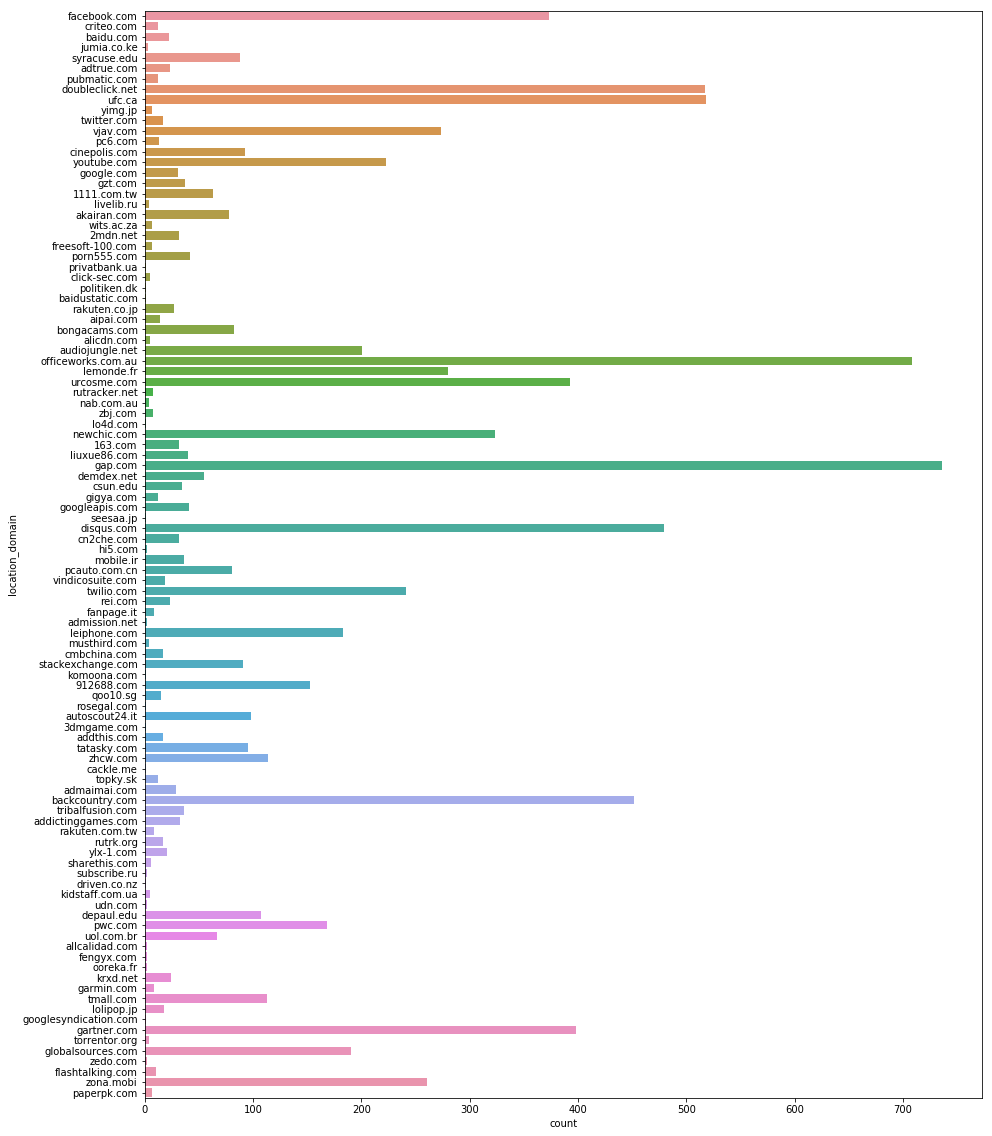

In [27]:
plt.figure(figsize=(15,20))
fig=sns.countplot(y='location_domain', data=df)

           arguments_n_keys  call_id  call_stack  crawl_id  file_name  \
in_iframe                                                               
False                  7511     7511        7511      7511       7511   
True                   1723     1723        1723      1723       1723   

           func_name  location  operation  script_col  script_line  \
in_iframe                                                            
False           7511      7511       7511        7511         7511   
True            1723      1723       1723        1723         1723   

               ...        script_url  symbol  time_stamp  value  value_1000  \
in_iframe      ...                                                            
False          ...              7511    7511        7511   7511        7511   
True           ...              1723    1723        1723   1723        1723   

           value_len  valid  errors  location_domain  script_domain  
in_iframe                              

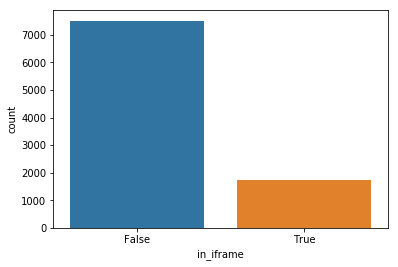

In [28]:
print(df.groupby('in_iframe').count())
sns.countplot(x='in_iframe', data=df)

Most of the scripts are not embedded in other documents. Out of the total 9234 entries, only 1723 have True values for in_iframe.

In [29]:
df.crawl_id.unique()

array([1])

All have crawl_id as "1". Therefore, for this sample, "crawl_id" is a redundant column.

In [30]:
df.drop('crawl_id', inplace=True, axis=1)

In [31]:
df.location_domain.unique()

array(['facebook.com', 'criteo.com', 'baidu.com', 'jumia.co.ke',
       'syracuse.edu', 'adtrue.com', 'pubmatic.com', 'doubleclick.net',
       'ufc.ca', 'yimg.jp', 'twitter.com', 'vjav.com', 'pc6.com',
       'cinepolis.com', 'youtube.com', 'google.com', 'gzt.com',
       '1111.com.tw', 'livelib.ru', 'akairan.com', 'wits.ac.za',
       '2mdn.net', 'freesoft-100.com', 'porn555.com', 'privatbank.ua',
       'click-sec.com', 'politiken.dk', 'baidustatic.com',
       'rakuten.co.jp', 'aipai.com', 'bongacams.com', 'alicdn.com',
       'audiojungle.net', 'officeworks.com.au', 'lemonde.fr',
       'urcosme.com', 'rutracker.net', 'nab.com.au', 'zbj.com',
       'lo4d.com', 'newchic.com', '163.com', 'liuxue86.com', 'gap.com',
       'demdex.net', 'csun.edu', 'gigya.com', 'googleapis.com',
       'seesaa.jp', 'disqus.com', 'cn2che.com', 'hi5.com', 'mobile.ir',
       'pcauto.com.cn', 'vindicosuite.com', 'twilio.com', 'rei.com',
       'fanpage.it', 'admission.net', 'leiphone.com', 'musthird.com

In [32]:
file_counts= df['file_name'].value_counts().to_dict()
file_counts

{'1_447020528f39d60852fadd88207fbee808db44678d10ce5df31a2171.json': 736,
 '1_2ca7c8942ef71c0b012aecded1a2cdda195cfaf11f92cd88c72a621b.json': 708,
 '1_0b59347f9b5c7acf14fca111bbfce3322e83e777aa67bb4b71ffead1.json': 518,
 '1_b025811b15b17cf7bf071a5b322668f076306ca12d9c6b7215d6d583.json': 452,
 '1_f001bb59462bc80ee8ec9e6592b571d0a465cf3e05665953e71b9fe9.json': 398,
 '1_34ec05e78c7f309ae4aa5e31a16b7b3149a2347c41ca43c2825e4052.json': 393,
 '1_3eb281b4819d77fd439f16ccfca5bca001e412654c0c26da08736c1d.json': 323,
 '1_9270964e083e12dfd3057445dd0cd0f58afb69b4d387b67262647f28.json': 304,
 '1_308c9473f2205655f84d2104ac0fbb8227fb2a7bb581b4315daf41eb.json': 280,
 '1_0f98444f4e1b012d36e673946689fd30ce37ef0ee71bc3f9f31981e2.json': 274,
 '1_fb7bbc059059b47e93d382a08df32421d04ec1f03082c0d8be04a5fe.json': 261,
 '1_8466b40bb6086f592eca129996d9067fe202afaa2c131c88f0ba7f32.json': 241,
 '1_50c245dc9814242dbb9540d3e7b626ca82cb869b2bb90a891fc87750.json': 228,
 '1_2bf1e3bbedc397dd374c204602cd043995748173ba0424e

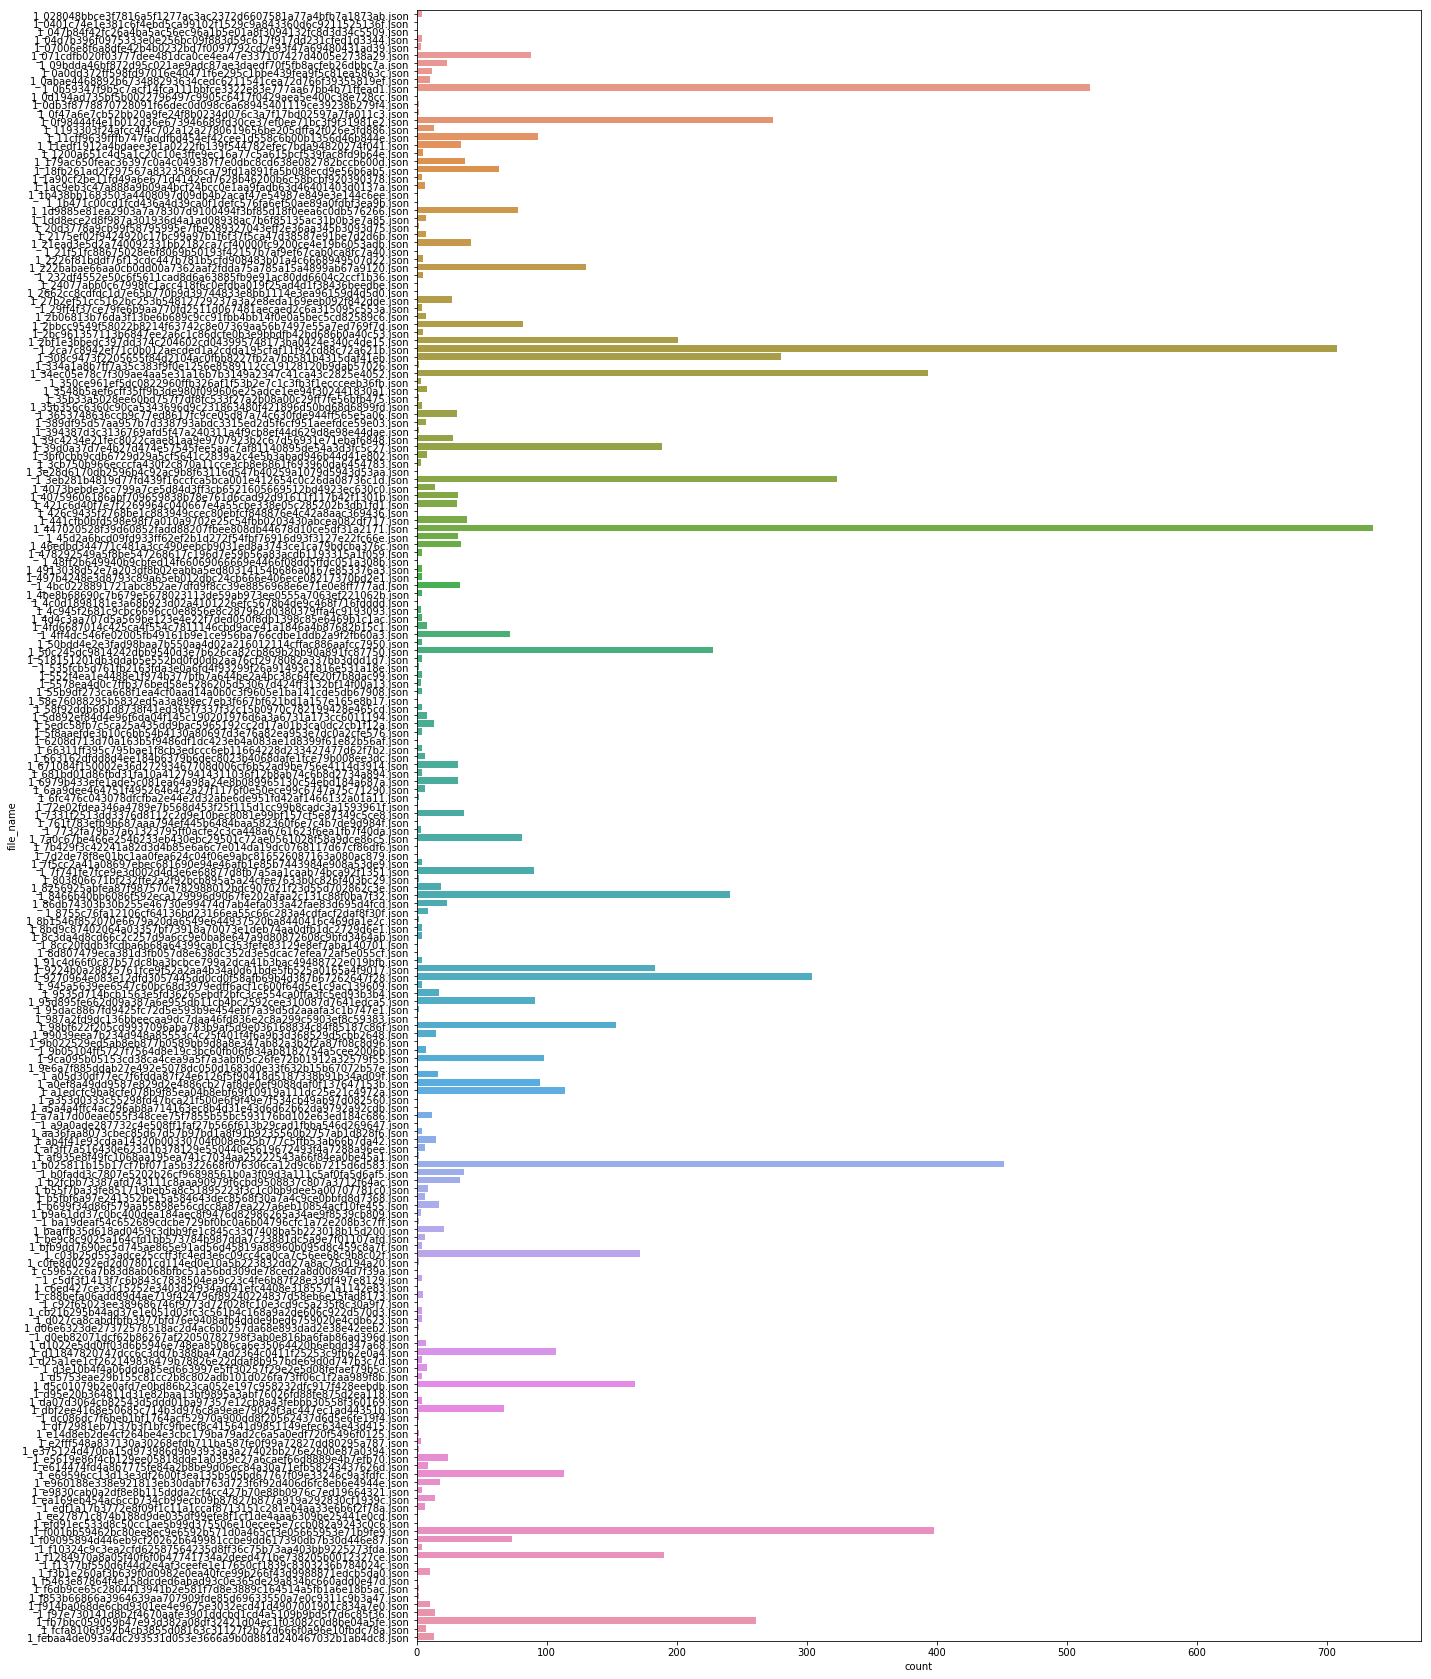

In [33]:
plt.figure(figsize=(18,30))
sns.countplot(y='file_name', data=df)

File names are not unique but follow a particular format. While the names are not esily understood, and converting the hexadecimal string to text using an [online convertor](https://www.online-toolz.com/tools/text-hex-convertor.php) did not produce any recognizable names, the clean format of data suggests that this column may be useful so it is not being dropped for now.

In [34]:
call_stack_counts= df['call_stack'].value_counts().to_dict()
call_stack_counts

{'': 5844,
 'Xa@https://cdn.optimizely.com/js/3523710858.js:311:482\nH@https://cdn.optimizely.com/js/3523710858.js:311:288\nvg@https://cdn.optimizely.com/js/3523710858.js:460:107\nt/<@https://cdn.optimizely.com/js/3523710858.js:304:294\nL/<@https://cdn.optimizely.com/js/3523710858.js:316:908\nD@https://cdn.optimizely.com/js/3523710858.js:317:65\nL@https://cdn.optimizely.com/js/3523710858.js:316:889\nvg/c.or@https://cdn.optimizely.com/js/3523710858.js:458:85\nvg@https://cdn.optimizely.com/js/3523710858.js:458:220\nt/<@https://cdn.optimizely.com/js/3523710858.js:304:294\nL/<@https://cdn.optimizely.com/js/3523710858.js:316:908\nD@https://cdn.optimizely.com/js/3523710858.js:317:65\nL@https://cdn.optimizely.com/js/3523710858.js:316:889\nvg/c.or@https://cdn.optimizely.com/js/3523710858.js:458:85\nvg@https://cdn.optimizely.com/js/3523710858.js:458:220\nt/<@https://cdn.optimizely.com/js/3523710858.js:304:294\nHb/<@https://cdn.optimizely.com/js/3523710858.js:316:838\nD@https://cdn.optimizely.co

The column of call_stack are not readable easily but it can be observed that they follow a format as some specific strings are present in each entry. However majority of entries are empty (5844 out of 9234) so this column can be dropped as it cannot be a major characterizing column 

In [35]:
df.drop('call_stack', inplace=True, axis=1)

In [36]:
call_id_counts= df['call_id'].value_counts().to_dict()
call_id_counts

{'1_9224b0a28825761fce9f52a2aa4b34a0d61bde5fb525a0165a4f9017.json__135': 1,
 '1_34ec05e78c7f309ae4aa5e31a16b7b3149a2347c41ca43c2825e4052.json__91': 1,
 '1_f1284970a8a05f40f6f0b47741734a2deed471be738205b0012327ce.json__5': 1,
 '1_39d0a37d7e4b27d474e57545fee5aac7af81140895de54a3d3fc5c27.json__142': 1,
 '1_34ec05e78c7f309ae4aa5e31a16b7b3149a2347c41ca43c2825e4052.json__288': 1,
 '1_b9a61dd37c0bc400dea184aec8f9476d82986265a34ae9f8539cb809.json__0': 1,
 '1_fb7bbc059059b47e93d382a08df32421d04ec1f03082c0d8be04a5fe.json__51': 1,
 '1_447020528f39d60852fadd88207fbee808db44678d10ce5df31a2171.json__714': 1,
 '1_98bf622f205cd9937096aba783b9af5d9e036168834c84f85187c86f.json__128': 1,
 '1_a1edcfc9ba8cfe078b9f85ea04b8ebf69f10919a111dc25e21c4972a.json__93': 1,
 '1_34ec05e78c7f309ae4aa5e31a16b7b3149a2347c41ca43c2825e4052.json__33': 1,
 '1_2ca7c8942ef71c0b012aecded1a2cdda195cfaf11f92cd88c72a621b.json__493': 1,
 '1_0f98444f4e1b012d36e673946689fd30ce37ef0ee71bc3f9f31981e2.json__6': 1,
 '1_9ca095b05153cd38ca

Call ID are unique values

In [37]:
location_counts= df['location'].value_counts().to_dict()
location_counts

{'http://www.gap.com/browse/category.do?cid=1096402&sop=true': 736,
 'https://www.officeworks.com.au/shop/officeworks/c/technology/hard-drives-data-storage/cd-dvd-media/dvdplus-rw': 708,
 'http://www.ufc.ca/media/Submission-of-the-Week-Mickey-Gall-vs-Mike-Jackson': 518,
 'https://www.backcountry.com/travel?show=all&p=gender%3Amale%7Cattr_age%3Aadult&nf=12': 452,
 'https://www.gartner.com/events/emea/customer-experience': 398,
 'https://www.urcosme.com/beauty_diary/475693/reviews': 393,
 'https://www.newchic.com/vintage-dresses-c-3664/': 323,
 'https://disqus.com/embed/comments/?base=default&f=sofifa&t_u=http%3A%2F%2Fsofifa.com%2Fplayer%2F231443&t_e=O.%20Demb%C3%A9l%C3%A9%20-%20Player%20-%20SoFIFA&t_d=Ousmane%20Demb%C3%A9l%C3%A9%20FIFA%2018%20Dec%2014%2C%202017%20SoFIFA&t_t=O.%20Demb%C3%A9l%C3%A9%20-%20Player%20-%20SoFIFA&s_o=default&l=en#version=8e0609b122e4529350708e7c7b2d6a12': 304,
 'http://www.lemonde.fr/service/licence_et_droits_de_reproduction.html': 280,
 'https://www.vjav.com/t

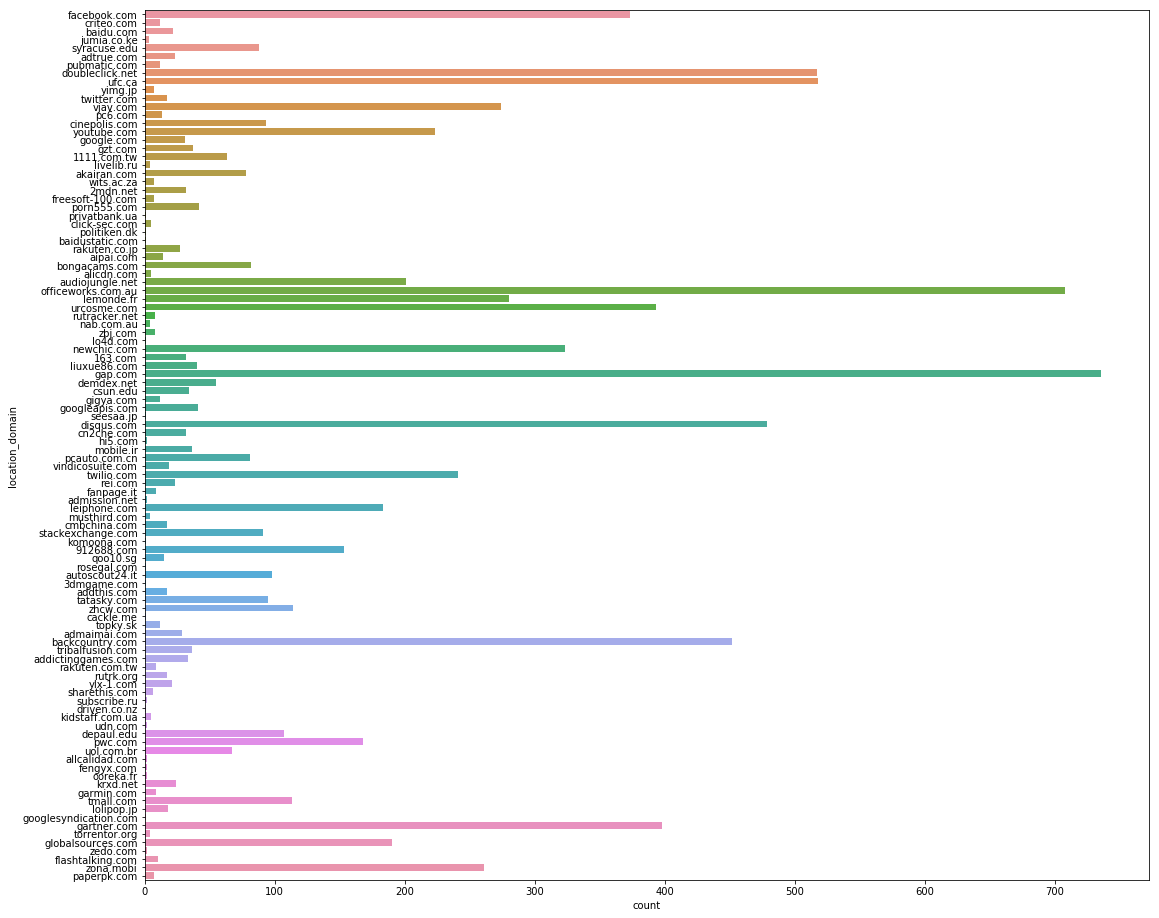

In [38]:
plt.figure(figsize=(18,16))
sns.countplot(y='location_domain', data=df)

In [39]:
script_url_counts= df['script_url'].value_counts().to_dict()
script_url_counts

{'https://www.google-analytics.com/analytics.js': 925,
 'https://mc.yandex.ru/metrika/watch.js': 422,
 'https://securepubads.g.doubleclick.net/gpt/pubads_impl_170.js': 313,
 'https://dnn506yrbagrg.cloudfront.net/pages/scripts/0056/3437.js?420392': 288,
 'https://c.disquscdn.com/next/embed/lounge.bundle.8d07a4869c3ec17ee1881ae6bd353027.js': 231,
 'https://libs.coremetrics.com/eluminate.js': 231,
 'http://cdn.optimizely.com/public/6529002483/s/gacat.js': 211,
 'https://static.xx.fbcdn.net/rsrc.php/v3iUNm4/y2/l/en_US/zwe_8Udp_Zd.js': 210,
 'https://ssl.google-analytics.com/ga.js': 206,
 'https://cdn.krxd.net/ctjs/controltag.js.c3e8e6311e44dfc4f051e4a261784fa1': 175,
 'https://cdn.optimizely.com/js/3523710858.js': 173,
 'http://static.chartbeat.com/js/chartbeat_video.js': 128,
 'https://biberukalap.com/1011165a059.1.n.2.1.js': 127,
 'https://cdn.dynamicyield.com/api/8768466/api_static.js': 119,
 'https://static.criteo.net/js/ld/ld.js': 108,
 'http://www.google-analytics.com/analytics.js': 

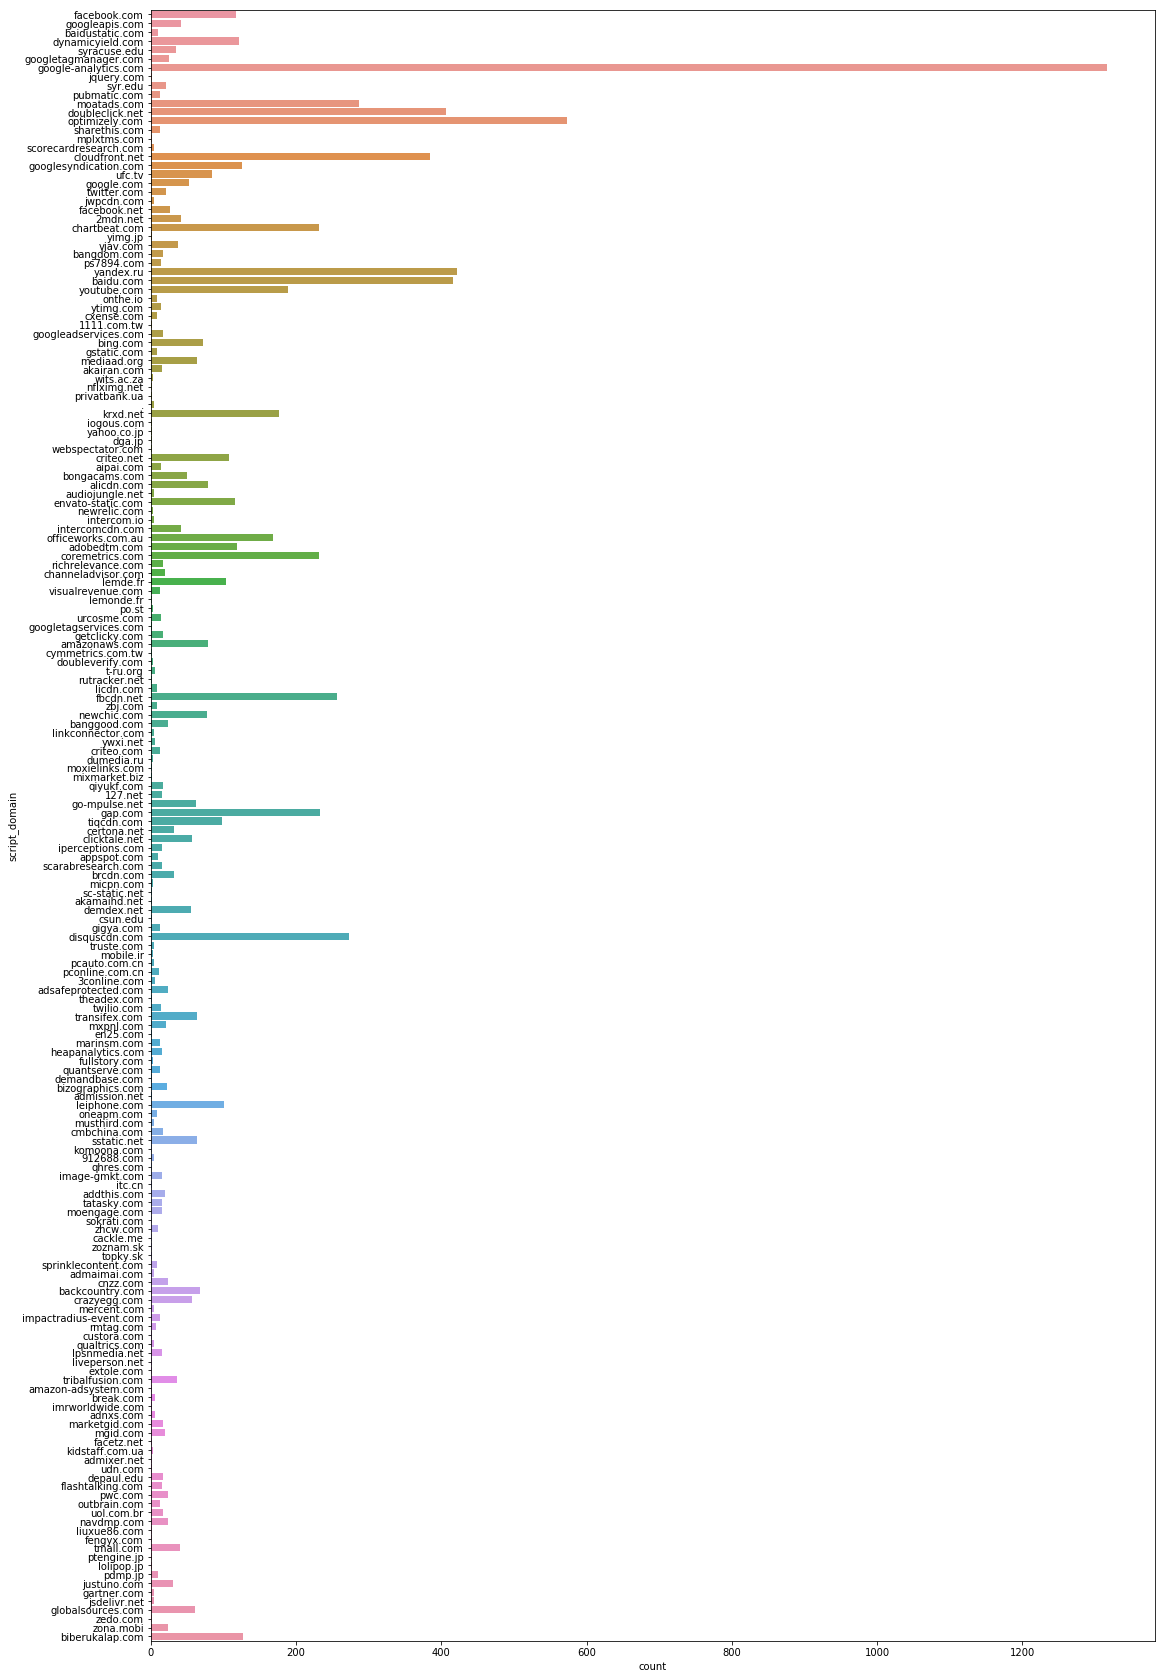

In [40]:
plt.figure(figsize=(18,30))
sns.countplot(y='script_domain', data=df)

In [41]:
df.script_domain.value_counts()

google-analytics.com     1317
optimizely.com            573
yandex.ru                 422
baidu.com                 416
doubleclick.net           407
cloudfront.net            385
moatads.com               287
disquscdn.com             273
fbcdn.net                 256
gap.com                   233
coremetrics.com           232
chartbeat.com             231
youtube.com               189
krxd.net                  177
officeworks.com.au        168
biberukalap.com           127
googlesyndication.com     125
dynamicyield.com          122
adobedtm.com              118
facebook.com              117
envato-static.com         116
criteo.net                108
lemde.fr                  103
leiphone.com              101
tiqcdn.com                 98
ufc.tv                     84
amazonaws.com              79
alicdn.com                 78
newchic.com                77
bing.com                   72
                         ... 
googletagservices.com       2
dga.jp                      2
akamaihd.n

googleanalytics is the most common script run, 1317 times.

In [42]:
func_counts=df['func_name'].value_counts().to_dict()
func_counts

{'': 631,
 'CE2.isMatchingSnapshot': 288,
 'zc': 285,
 'Ca': 247,
 'G': 157,
 'Xa': 146,
 'mt.sessionStorage.get': 132,
 'ra': 129,
 'a.a.r': 126,
 'i.prototype.setItem': 121,
 'IORequest.find_cookie': 108,
 'c.read': 100,
 'c': 99,
 'pd': 87,
 'i': 85,
 'Se</<.value': 84,
 'ir': 81,
 'a/h.prototype.applyShadow': 80,
 'X': 78,
 'mt.localStorage.get': 72,
 'F<.create': 71,
 'cI': 70,
 't.cookie': 70,
 'a/<': 69,
 'Kc': 68,
 'fc': 68,
 'Q<.get': 67,
 'l': 64,
 'h': 63,
 'find_os_and_device_name': 63,
 'mf': 63,
 'q.getFingerPrint': 60,
 'k': 59,
 'F<.read': 58,
 'c.create': 57,
 'g.h.get': 56,
 't.exports</LocalStorageStore.prototype.get/r<': 55,
 't.exports</LocalStorageStore.prototype.get/n<': 55,
 'me': 54,
 '.get': 54,
 'AppMeasurement/a.cookieRead': 54,
 '[20]</<.get': 54,
 'A': 52,
 'mt.sessionStorage.set': 51,
 'i/<': 49,
 't': 48,
 'window.criteo_q</t': 48,
 'd': 48,
 'i.prototype.getItem': 48,
 'r': 47,
 'getCookie': 47,
 'p': 46,
 'x': 46,
 'i.prototype.removeItem': 46,
 'Tr.pr

In [43]:
df.columns

Index(['arguments_n_keys', 'call_id', 'file_name', 'func_name', 'in_iframe',
       'location', 'operation', 'script_col', 'script_line', 'script_loc_eval',
       'script_url', 'symbol', 'time_stamp', 'value', 'value_1000',
       'value_len', 'valid', 'errors', 'location_domain', 'script_domain'],
      dtype='object')

In [44]:
df.operation.unique()

array(['get', 'call', 'set'], dtype=object)

In [45]:
df.script_col.unique()

array(['1802', '2895', '2781', ..., '28341', '28451', '1334'],
      dtype=object)

In [45]:
df.script_line.unique()

array(['57', '49', '25', '1', '3', '36', '70', '95', '4', '45', '46', '5',
       '42', '39', '6', '2', '7', '60', '40', '14', '8', '37', '188',
       '251', '174', '178', '357', '186', '185', '15', '69', '98', '58',
       '59', '35', '33', '34', '55', '13', '62', '12', '91', '171', '263',
       '66', '90', '111', '227', '67', '162', '272', '165', '163', '29',
       '28', '30', '9', '131', '27', '26', '22', '41', '54', '1695',
       '1922', '74', '85', '10', '24', '31', '80', '142', '116', '122',
       '71', '89', '73', '75', '76', '52', '18', '16', '17', '82', '115',
       '51', '56', '81', '64', '65', '225', '213', '206', '214', '4228',
       '4740', '2122', '5706', '2123', '208', '207', '519', '100', '4306',
       '5708', '44', '167', '203', '199', '200', '169', '173', '72', '93',
       '86', '87', '50', '11', '495', '918', '919', '61', '110', '177',
       '222', '264', '246', '247', '19', '20', '325', '388', '311', '315',
       '494', '323', '322', '532', '531', '542', 

In [46]:
df.script_loc_eval.unique()

array(['', 'line 1 > eval', 'line 2 > eval', 'line 481 > eval',
       'line 14 > Function', 'line 69 > eval',
       'line 1 > Function line 1 > eval line 1 > eval',
       'line 1 > Function line 1 > eval', 'line 168 > Function',
       'line 28 > eval', 'line 89 > eval'], dtype=object)

In [47]:
df.symbol.unique()

array(['window.name', 'window.document.cookie',
       'window.navigator.userAgent', 'window.Storage.getItem',
       'HTMLCanvasElement.getContext',
       'CanvasRenderingContext2D.textBaseline',
       'CanvasRenderingContext2D.font', 'HTMLCanvasElement.width',
       'HTMLCanvasElement.height', 'CanvasRenderingContext2D.fillText',
       'HTMLCanvasElement.toDataURL', 'window.screen.colorDepth',
       'window.navigator.plugins[Shockwave Flash].name',
       'window.navigator.plugins[Shockwave Flash].description',
       'window.navigator.language', 'window.navigator.appVersion',
       'window.navigator.cookieEnabled', 'window.navigator.platform',
       'window.navigator.appName', 'window.localStorage',
       'window.sessionStorage', 'window.Storage.setItem',
       'window.navigator.product', 'window.navigator.doNotTrack',
       'window.navigator.plugins[Shockwave Flash].length',
       'window.navigator.mimeTypes[application/x-shockwave-flash].type',
       'window.navigator.

In [48]:
df.time_stamp.nunique()

4897

In [49]:
df.value.nunique()

1224

In [50]:
df.value_1000.nunique()

1172

In [51]:
df.valid.nunique()

1

All have same values, hence it is redundant

In [52]:
df.drop('valid', inplace=True, axis=1)

In [53]:
df.errors.nunique()

1

In [54]:
df.drop('errors', inplace=True, axis=1)

In [55]:
df.head()

arguments_n_keys                                            call_id  \
0                 0  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...   
1                 0  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...   
2                 0  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...   
3                 0  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...   
4                 0  1_0401c74e1e381c6f4ebd5ca99102f1529c9a843360d6...   

                                           file_name func_name  in_iframe  \
0  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...       a/<       True   
1  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...       a/<       True   
2  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...         A       True   
3  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...         x       True   
4  1_0401c74e1e381c6f4ebd5ca99102f1529c9a843360d6...      ra/<       True   

                                            location operation script_col  \
0  https://staticxx.facebook.com/connect/xd_arbit...       get       1802   
1  https://staticxx.facebook.com/connect/xd_arbit...       get       2895   
2  https://staticxx.facebook.com/connect/xd_arbit...       get       2781   
3  https://staticxx.facebook.com/connect/xd_arbit...       get        156   
4  https://cas.us.criteo.com/delivery/r/afr.php?d...       get        306   

  script_line script_loc_eval  \
0          57                   
1          57                   
2          57                   
3          49                   
4          25                   

                                          script_url  \
0  https://staticxx.facebook.com/connect/xd_arbit...   
1  https://staticxx.facebook.com/connect/xd_arbit...   
2  https://staticxx.facebook.com/connect/xd_arbit...   
3  https://staticxx.facebook.com/connect/xd_arbit...   
4  https://ajax.googleapis.com/ajax/libs/webfont/...   

                       symbol              time_stamp  \
0                 window.name 2017-12-16 02:54:10.079   
1                 window.name 2017-12-16 02:54:10.080   
2      window.document.cookie 2017-12-16 02:54:10.086   
3  window.navigator.userAgent 2017-12-16 02:54:10.088   
4  window.navigator.userAgent 2017-12-16 07:12:07.104   

                                               value  \
0                                 fb_xdm_frame_https   
1                                 fb_xdm_frame_https   
2                                                      
3  Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...   
4  Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...   

                                          value_1000  value_len  \
0                                 fb_xdm_frame_https         18   
1                                 fb_xdm_frame_https         18   
2                                                             0   
3  Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...         68   
4  Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...         68   

  location_domain   script_domain  
0    facebook.com    facebook.com  
1    facebook.com    facebook.com  
2    facebook.com    facebook.com  
3    facebook.com    facebook.com  
4      criteo.com  googleapis.com

## Obeservations from Ghostery Study and Sample

In [56]:
loc_counts= df['location_domain'].value_counts().to_dict()
loc_counts

{'gap.com': 736,
 'officeworks.com.au': 708,
 'ufc.ca': 518,
 'doubleclick.net': 517,
 'disqus.com': 479,
 'backcountry.com': 452,
 'gartner.com': 398,
 'urcosme.com': 393,
 'facebook.com': 373,
 'newchic.com': 323,
 'lemonde.fr': 280,
 'vjav.com': 274,
 'zona.mobi': 261,
 'twilio.com': 241,
 'youtube.com': 223,
 'audiojungle.net': 201,
 'globalsources.com': 190,
 'leiphone.com': 183,
 'pwc.com': 168,
 '912688.com': 153,
 'zhcw.com': 114,
 'tmall.com': 113,
 'depaul.edu': 107,
 'autoscout24.it': 98,
 'tatasky.com': 95,
 'cinepolis.com': 93,
 'stackexchange.com': 91,
 'syracuse.edu': 88,
 'bongacams.com': 82,
 'pcauto.com.cn': 81,
 'akairan.com': 78,
 'uol.com.br': 67,
 '1111.com.tw': 63,
 'demdex.net': 55,
 'porn555.com': 42,
 'googleapis.com': 41,
 'liuxue86.com': 40,
 'gzt.com': 37,
 'tribalfusion.com': 36,
 'mobile.ir': 36,
 'csun.edu': 34,
 'addictinggames.com': 33,
 '2mdn.net': 32,
 '163.com': 32,
 'cn2che.com': 32,
 'google.com': 31,
 'admaimai.com': 29,
 'rakuten.co.jp': 27,
 'k

According to the observations in "[Tracking the Trackers](https://www.ghostery.com/lp/study/)", Google Analytics, followed by Facebook Connect, are most prevalent scripts. However, from the above observations, we can see that "gap" , followed by Officeworks, are the most common script urls in this sample. A search reveals that GAP stands for "Google Analytics Painless" which supports the article. But here the second most common script url is that of "officeworks" not "facebook".

The complete study [Tracking the Trackers](https://www.ghostery.com/wp-content/themes/ghostery/images/campaigns/tracker-study/Ghostery_Study_-_Tracking_the_Trackers.pdf) compares usage across different regions through IP addresses. To do something similar, IP address can be found through through "script_url" and use it to look up for regions. To lookup for IPs, [GeoIP](https://geoip-db.com/) is used.

In [57]:
import socket  # using socket: https://docs.python.org/2/library/socket.html

In [58]:
def find_ip(s):
    ipadd=socket.gethostbyname(s)
    return ipadd

In [68]:
ddf.columns

Index(['argument_0', 'argument_1', 'argument_2', 'argument_3', 'argument_4',
       'argument_5', 'argument_6', 'argument_7', 'argument_8', 'arguments',
       'arguments_n_keys', 'call_id', 'call_stack', 'crawl_id', 'file_name',
       'func_name', 'in_iframe', 'location', 'operation', 'script_col',
       'script_line', 'script_loc_eval', 'script_url', 'symbol', 'time_stamp',
       'value', 'value_1000', 'value_len', 'valid', 'errors'],
      dtype='object')

In [70]:
ddf.drop(['argument_0', 'argument_1', 'argument_2', 'argument_3', 'argument_4', 'argument_5', 'argument_6', 'argument_7', 'argument_8', 'arguments', 'call_stack', 'crawl_id', 'valid', 'errors'], axis=1)

Dask DataFrame Structure:
              arguments_n_keys call_id file_name func_name in_iframe location operation script_col script_line script_loc_eval script_url  symbol      time_stamp   value value_1000 value_len
npartitions=1                                                                                                                                                                                 
                         int64  object    object    object      bool   object    object     object      object          object     object  object  datetime64[ns]  object     object     int32
                           ...     ...       ...       ...       ...      ...       ...        ...         ...             ...        ...     ...             ...     ...        ...       ...
Dask Name: drop, 2 tasks

In [59]:
from tqdm import tqdm    # for showing progress bar

In [76]:
tqdm.pandas()

In [79]:
df2=pd.read_csv("/media/pankhuri/MData/safe_dataset.sample/sample/country_analysis", )

In [78]:
df['ip_address']=df['location_domain'].progress_apply(find_ip)






  0%|          | 0/9234 [00:00<?, ?it/s]




  0%|          | 15/9234 [00:00<04:21, 35.28it/s]




  2%|▏         | 183/9234 [00:00<03:01, 49.95it/s]

gaierror: [Errno -2] Name or service not known






  7%|▋         | 665/9234 [00:13<02:51, 49.95it/s]

In [80]:
df2.head()

Unnamed: 0 country      ip_address
0           0       0   157.240.16.20
1           1       0   157.240.16.20
2           2       0   157.240.16.20
3           3       0   157.240.16.20
4           4       0  74.119.119.141

In [63]:
df.head()

arguments_n_keys                                            call_id  \
0                 0  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...   
1                 0  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...   
2                 0  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...   
3                 0  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...   
4                 0  1_0401c74e1e381c6f4ebd5ca99102f1529c9a843360d6...   

                                           file_name func_name  in_iframe  \
0  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...       a/<       True   
1  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...       a/<       True   
2  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...         A       True   
3  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...         x       True   
4  1_0401c74e1e381c6f4ebd5ca99102f1529c9a843360d6...      ra/<       True   

                                            location operation script_col  \
0  https://staticxx.facebook.com/connect/xd_arbit...       get       1802   
1  https://staticxx.facebook.com/connect/xd_arbit...       get       2895   
2  https://staticxx.facebook.com/connect/xd_arbit...       get       2781   
3  https://staticxx.facebook.com/connect/xd_arbit...       get        156   
4  https://cas.us.criteo.com/delivery/r/afr.php?d...       get        306   

  script_line script_loc_eval  \
0          57                   
1          57                   
2          57                   
3          49                   
4          25                   

                                          script_url  \
0  https://staticxx.facebook.com/connect/xd_arbit...   
1  https://staticxx.facebook.com/connect/xd_arbit...   
2  https://staticxx.facebook.com/connect/xd_arbit...   
3  https://staticxx.facebook.com/connect/xd_arbit...   
4  https://ajax.googleapis.com/ajax/libs/webfont/...   

                       symbol              time_stamp  \
0                 window.name 2017-12-16 02:54:10.079   
1                 window.name 2017-12-16 02:54:10.080   
2      window.document.cookie 2017-12-16 02:54:10.086   
3  window.navigator.userAgent 2017-12-16 02:54:10.088   
4  window.navigator.userAgent 2017-12-16 07:12:07.104   

                                               value  \
0                                 fb_xdm_frame_https   
1                                 fb_xdm_frame_https   
2                                                      
3  Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...   
4  Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...   

                                          value_1000  value_len  \
0                                 fb_xdm_frame_https         18   
1                                 fb_xdm_frame_https         18   
2                                                             0   
3  Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...         68   
4  Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...         68   

  location_domain   script_domain  
0    facebook.com    facebook.com  
1    facebook.com    facebook.com  
2    facebook.com    facebook.com  
3    facebook.com    facebook.com  
4      criteo.com  googleapis.com

In [81]:
import urllib.request
import json

In [85]:
def find_country(ip):
    geoip_add="https://geoip-db.com/jsonp/"
    req=geoip_add+ip
    with urllib.request.urlopen(req) as url:
        data = url.read().decode()
        data = data.split("(")[1].strip(")")
        with_cn=data.split(',')[1]
        return with_cn.split("\"")[3]

In [86]:
df.insert(len(df.columns), 'country', 0)

In [87]:
df.head()

arguments_n_keys                                            call_id  \
0                 0  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...   
1                 0  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...   
2                 0  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...   
3                 0  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...   
4                 0  1_0401c74e1e381c6f4ebd5ca99102f1529c9a843360d6...   

                                           file_name func_name  in_iframe  \
0  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...       a/<       True   
1  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...       a/<       True   
2  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...         A       True   
3  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...         x       True   
4  1_0401c74e1e381c6f4ebd5ca99102f1529c9a843360d6...      ra/<       True   

                                            location operation script_col  \
0  https://staticxx.facebook.com/connect/xd_arbit...       get       1802   
1  https://staticxx.facebook.com/connect/xd_arbit...       get       2895   
2  https://staticxx.facebook.com/connect/xd_arbit...       get       2781   
3  https://staticxx.facebook.com/connect/xd_arbit...       get        156   
4  https://cas.us.criteo.com/delivery/r/afr.php?d...       get        306   

  script_line script_loc_eval  \
0          57                   
1          57                   
2          57                   
3          49                   
4          25                   

                                          script_url  \
0  https://staticxx.facebook.com/connect/xd_arbit...   
1  https://staticxx.facebook.com/connect/xd_arbit...   
2  https://staticxx.facebook.com/connect/xd_arbit...   
3  https://staticxx.facebook.com/connect/xd_arbit...   
4  https://ajax.googleapis.com/ajax/libs/webfont/...   

                       symbol              time_stamp  \
0                 window.name 2017-12-16 02:54:10.079   
1                 window.name 2017-12-16 02:54:10.080   
2      window.document.cookie 2017-12-16 02:54:10.086   
3  window.navigator.userAgent 2017-12-16 02:54:10.088   
4  window.navigator.userAgent 2017-12-16 07:12:07.104   

                                               value  \
0                                 fb_xdm_frame_https   
1                                 fb_xdm_frame_https   
2                                                      
3  Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...   
4  Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...   

                                          value_1000  value_len  \
0                                 fb_xdm_frame_https         18   
1                                 fb_xdm_frame_https         18   
2                                                             0   
3  Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...         68   
4  Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...         68   

  location_domain   script_domain  country  
0    facebook.com    facebook.com        0  
1    facebook.com    facebook.com        0  
2    facebook.com    facebook.com        0  
3    facebook.com    facebook.com        0  
4      criteo.com  googleapis.com        0

In [88]:
df['country']=df2['ip_address'].progress_apply(find_country)







  0%|          | 0/9234 [00:00<?, ?it/s]





  0%|          | 2/9234 [00:00<1:15:10,  2.05it/s]





  0%|          | 3/9234 [00:01<1:23:45,  1.84it/s]





  0%|          | 4/9234 [00:02<1:30:43,  1.70it/s]





  0%|          | 5/9234 [00:03<1:35:29,  1.61it/s]





  0%|          | 6/9234 [00:03<1:39:06,  1.55it/s]





  0%|          | 7/9234 [00:04<1:40:50,  1.52it/s]





  0%|          | 8/9234 [00:05<1:42:03,  1.51it/s]





  0%|          | 9/9234 [00:05<1:43:12,  1.49it/s]





  0%|          | 10/9234 [00:06<1:43:52,  1.48it/s]





  0%|          | 11/9234 [00:07<1:45:06,  1.46it/s]





  0%|          | 12/9234 [00:07<1:45:15,  1.46it/s]





  0%|          | 13/9234 [00:08<1:44:54,  1.46it/s]





  0%|          | 14/9234 [00:09<1:44:41,  1.47it/s]





  0%|          | 15/9234 [00:09<1:44:32,  1.47it/s]





  0%|          | 16/9234 [00:10<1:44:24,  1.47it/s]





  0%|          | 17/9234 [00:11<1:44:23,  1.47it/s]





  0%|          | 18/9234 [00:11<1:44:44,  1.

KeyboardInterrupt: 

In [101]:
"""
for i in range(1,9234):
    if df2['country'][i]=='0':
        df2['country'][i]=find_country(df2['ip_address'][i])
        print (i, end=" ")
    else:
        df2['country'][i]=df2['country'][i]
"""

'\nfor i in range(1,9234):\n    if df2[\'country\'][i]==\'0\':\n        df2[\'country\'][i]=find_country(df2[\'ip_address\'][i])\n        print (i, end=" ")\n    else:\n        df2[\'country\'][i]=df2[\'country\'][i]\n'

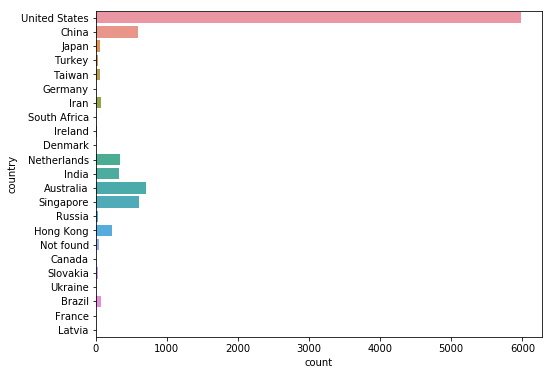

In [102]:
plt.figure(figsize=(8,6))
sns.countplot(y='country', data=df2)

In [95]:
df2.groupby('country').count()

Unnamed: 0  ip_address
country                              
0                       1           1
Australia             708         708
Brazil                 67          67
Canada                  1           1
China                 600         600
Denmark                 1           1
France                  2           2
Germany                 5           5
Hong Kong             222         222
India                 332         332
Iran                   78          78
Ireland                10          10
Japan                  60          60
Latvia                  4           4
Netherlands           343         343
Not found              40          40
Russia                 27          27
Singapore             608         608
Slovakia               33          33
South Africa            7           7
Taiwan                 63          63
Turkey                 37          37
Ukraine                 5           5
United States        5980        5980

In [98]:
df2['country'][0]=find_country(df2['ip_address'][0])

/home/pankhuri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


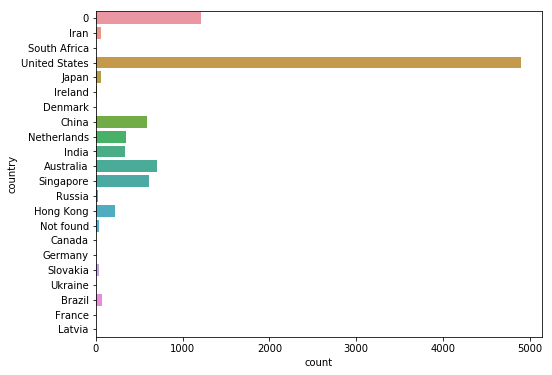

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(y='country', data=df)

United States consists of most page loads, same as the results of Ghostery study. However, after United States, in the study the most page loads were in Russia, France and Germany whereas here are in Australia, China and Singapore. The differences could be due to the way data is collected as there the data of German users was collected.

In [103]:
df.head(10)

arguments_n_keys                                            call_id  \
0                 0  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...   
1                 0  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...   
2                 0  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...   
3                 0  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...   
4                 0  1_0401c74e1e381c6f4ebd5ca99102f1529c9a843360d6...   
5                 0  1_047b84f42fc26a4ba5ac56ec96a1b5e01a8f3094132f...   
6                 0  1_04d7b396f0975333e0e256bc09f883d59c617f917dd2...   
7                 0  1_04d7b396f0975333e0e256bc09f883d59c617f917dd2...   
8                 0  1_04d7b396f0975333e0e256bc09f883d59c617f917dd2...   
9                 0  1_04d7b396f0975333e0e256bc09f883d59c617f917dd2...   

                                           file_name func_name  in_iframe  \
0  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...       a/<       True   
1  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...       a/<       True   
2  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...         A       True   
3  1_028048bbce3f7816a5f1277ac3ac2372d6607581a77a...         x       True   
4  1_0401c74e1e381c6f4ebd5ca99102f1529c9a843360d6...      ra/<       True   
5  1_047b84f42fc26a4ba5ac56ec96a1b5e01a8f3094132f...                 True   
6  1_04d7b396f0975333e0e256bc09f883d59c617f917dd2...       a/<       True   
7  1_04d7b396f0975333e0e256bc09f883d59c617f917dd2...       a/<       True   
8  1_04d7b396f0975333e0e256bc09f883d59c617f917dd2...         A       True   
9  1_04d7b396f0975333e0e256bc09f883d59c617f917dd2...         x       True   

                                            location operation script_col  \
0  https://staticxx.facebook.com/connect/xd_arbit...       get       1802   
1  https://staticxx.facebook.com/connect/xd_arbit...       get       2895   
2  https://staticxx.facebook.com/connect/xd_arbit...       get       2781   
3  https://staticxx.facebook.com/connect/xd_arbit...       get        156   
4  https://cas.us.criteo.com/delivery/r/afr.php?d...       get        306   
5  http://pos.baidu.com/rcwm?rdid=2835655&dc=3&di...       get          1   
6  https://staticxx.facebook.com/connect/xd_arbit...       get       1802   
7  https://staticxx.facebook.com/connect/xd_arbit...       get       2895   
8  https://staticxx.facebook.com/connect/xd_arbit...       get       2781   
9  https://staticxx.facebook.com/connect/xd_arbit...       get        156   

  script_line script_loc_eval  \
0          57                   
1          57                   
2          57                   
3          49                   
4          25                   
5           1                   
6          57                   
7          57                   
8          57                   
9          49                   

                                          script_url  \
0  https://staticxx.facebook.com/connect/xd_arbit...   
1  https://staticxx.facebook.com/connect/xd_arbit...   
2  https://staticxx.facebook.com/connect/xd_arbit...   
3  https://staticxx.facebook.com/connect/xd_arbit...   
4  https://ajax.googleapis.com/ajax/libs/webfont/...   
5  http://cpro.baidustatic.com/cpro/ui/noexpire/j...   
6  https://staticxx.facebook.com/connect/xd_arbit...   
7  https://staticxx.facebook.com/connect/xd_arbit...   
8  https://staticxx.facebook.com/connect/xd_arbit...   
9  https://staticxx.facebook.com/connect/xd_arbit...   

                       symbol              time_stamp  \
0                 window.name 2017-12-16 02:54:10.079   
1                 window.name 2017-12-16 02:54:10.080   
2      window.document.cookie 2017-12-16 02:54:10.086   
3  window.navigator.userAgent 2017-12-16 02:54:10.088   
4  window.navigator.userAgent 2017-12-16 07:12:07.104   
5  window.navigator.userAgent 2017-12-16 00:44:02.937   
6                 window.name 2017-12-16 10:47:17.171   
7                 window.name 2017-12-16 10:47:17.172  

In [104]:
df2=df.groupby(['location']).count()

In [105]:
df2[['script_url', 'operation', 'value', 'country']]

script_url  operation  \
location                                                                    
http://ads.pubmatic.com/AdServer/js/showad.js#P...          12         12   
http://allcalidad.com/category/belico/                       2          2   
http://atiws.aipai.com/AtiWs/atidatas?zid=32&ga...           7          7   
http://atiws.aipai.com/AtiWs/atidatas?zid=32&ga...           7          7   
http://b.fengyx.com/m.html?mediaid=ea0566d81d18...           2          2   
http://baike.pcauto.com.cn/147.html                         81         81   
http://blog.bongacams.com/                                  82         82   
http://blog.seesaa.jp/contents/category/volunte...           1          1   
http://cdn.komoona.com/sync/ps?p=81E06B01-AFA5-...           1          1   
http://fast.aufeminin.demdex.net/dest5.html?d_n...           7          7   
http://fast.cbsi.demdex.net/dest5.html?d_nsid=0...          13         13   
http://fast.worldbank.demdex.net/dest5.html?d_n...           3          3   
http://hk.cmbchina.com/                                     17         17   
http://imasdk.googleapis.com/js/core/bridge3.18...          33         33   
http://politiken.dk/kultur/boger/art6156600/%C2...           1          1   
http://porn555.com/en/momo%20ogura/                         42         42   
http://pos.baidu.com/jcam?rdid=2608580&dc=3&di=...           1          1   
http://pos.baidu.com/kchm?rdid=3104972&dc=3&di=...           1          1   
http://pos.baidu.com/pcim?sz=1190x120&rdid=3084...           1          1   
http://pos.baidu.com/rcwm?rdid=2835655&dc=3&di=...           1          1   
http://pos.baidu.com/s?hei=220&wid=950&di=u3084...           1          1   
http://rutracker.net/forum/viewforum.php?f=2355              8          8   
http://rutrk.org/iframe/MG-2/MG-bottom.html?rnd...          17         17   
http://s7.addthis.com/static/sh.7a295a410262af1...          16         16   
http://s7.addthis.com/static/sh.7a295a410262af1...           1          1   
http://staticxx.facebook.com/connect/xd_arbiter...           4          4   
http://staticxx.facebook.com/connect/xd_arbiter...           4          4   
http://staticxx.facebook.com/connect/xd_arbiter...           4          4   
http://staticxx.facebook.com/connect/xd_arbiter...           4          4   
http://staticxx.facebook.com/connect/xd_arbiter...           4          4   
...                                                        ...        ...   
https://www.facebook.com/v2.8/plugins/share_but...           4          4   
https://www.facebook.com/v2.8/plugins/share_but...           4          4   
https://www.gartner.com/events/emea/customer-ex...         398        398   
https://www.google.com/recaptcha/api2/anchor?k=...           1          1   
https://www.google.com/recaptcha/api2/bframe?hl...           1          1   
https://www.google.com/shopping/customerreviews...           5          5   
https://www.gzt.com/gazeteler/star-gazetesi                 37         37   
https://www.jumia.co.ke/shipping_policy/                     3          3   
https://www.kidstaff.com.ua/goods/home/112/1253              5          5   
https://www.leiphone.com/news/201712/gU9hsY7eCj...         183        183   
https://www.liuxue86.com/shouchaobao/chuantong/             39         39   
https://www.livelib.ru/book/1002514067-deti-ede...           4          4   
https://www.mobile.ir/tablets/index.aspx                    36         36   
https://www.nab.com.au/about-us/corporate-respo...           4          4   
https://www.newchic.com/vintage-dresses-c-3664/            323        323   
https://www.officeworks.com.au/shop/officeworks...         708        708   
https://www.ooreka.fr/univers/argent                         2          2   
https://www.pwc.com/gx/en/industries/transporta...         168        168   
https://www.qoo10.sg/gmkt.inc/Category/?gdlc_cd...          15         15   
https://www.rakuten.com.tw/search/%E5%B0%8F%E7%.

In [106]:
df2['location']=df2.index
df2.set_index(keys=np.arange(0,200), inplace=True)

In [107]:
df2.head()

arguments_n_keys  call_id  file_name  func_name  in_iframe  operation  \
0                12       12         12         12         12         12   
1                 2        2          2          2          2          2   
2                 7        7          7          7          7          7   
3                 7        7          7          7          7          7   
4                 2        2          2          2          2          2   

   script_col  script_line  script_loc_eval  script_url  symbol  time_stamp  \
0          12           12               12          12      12          12   
1           2            2                2           2       2           2   
2           7            7                7           7       7           7   
3           7            7                7           7       7           7   
4           2            2                2           2       2           2   

   value  value_1000  value_len  location_domain  script_domain  country  \
0     12          12         12               12             12       12   
1      2           2          2                2              2        2   
2      7           7          7                7              7        7   
3      7           7          7                7              7        7   
4      2           2          2                2              2        2   

                                            location  
0  http://ads.pubmatic.com/AdServer/js/showad.js#...  
1             http://allcalidad.com/category/belico/  
2  http://atiws.aipai.com/AtiWs/atidatas?zid=32&g...  
3  http://atiws.aipai.com/AtiWs/atidatas?zid=32&g...  
4  http://b.fengyx.com/m.html?mediaid=ea0566d81d1...

<BarContainer object of 200 artists>

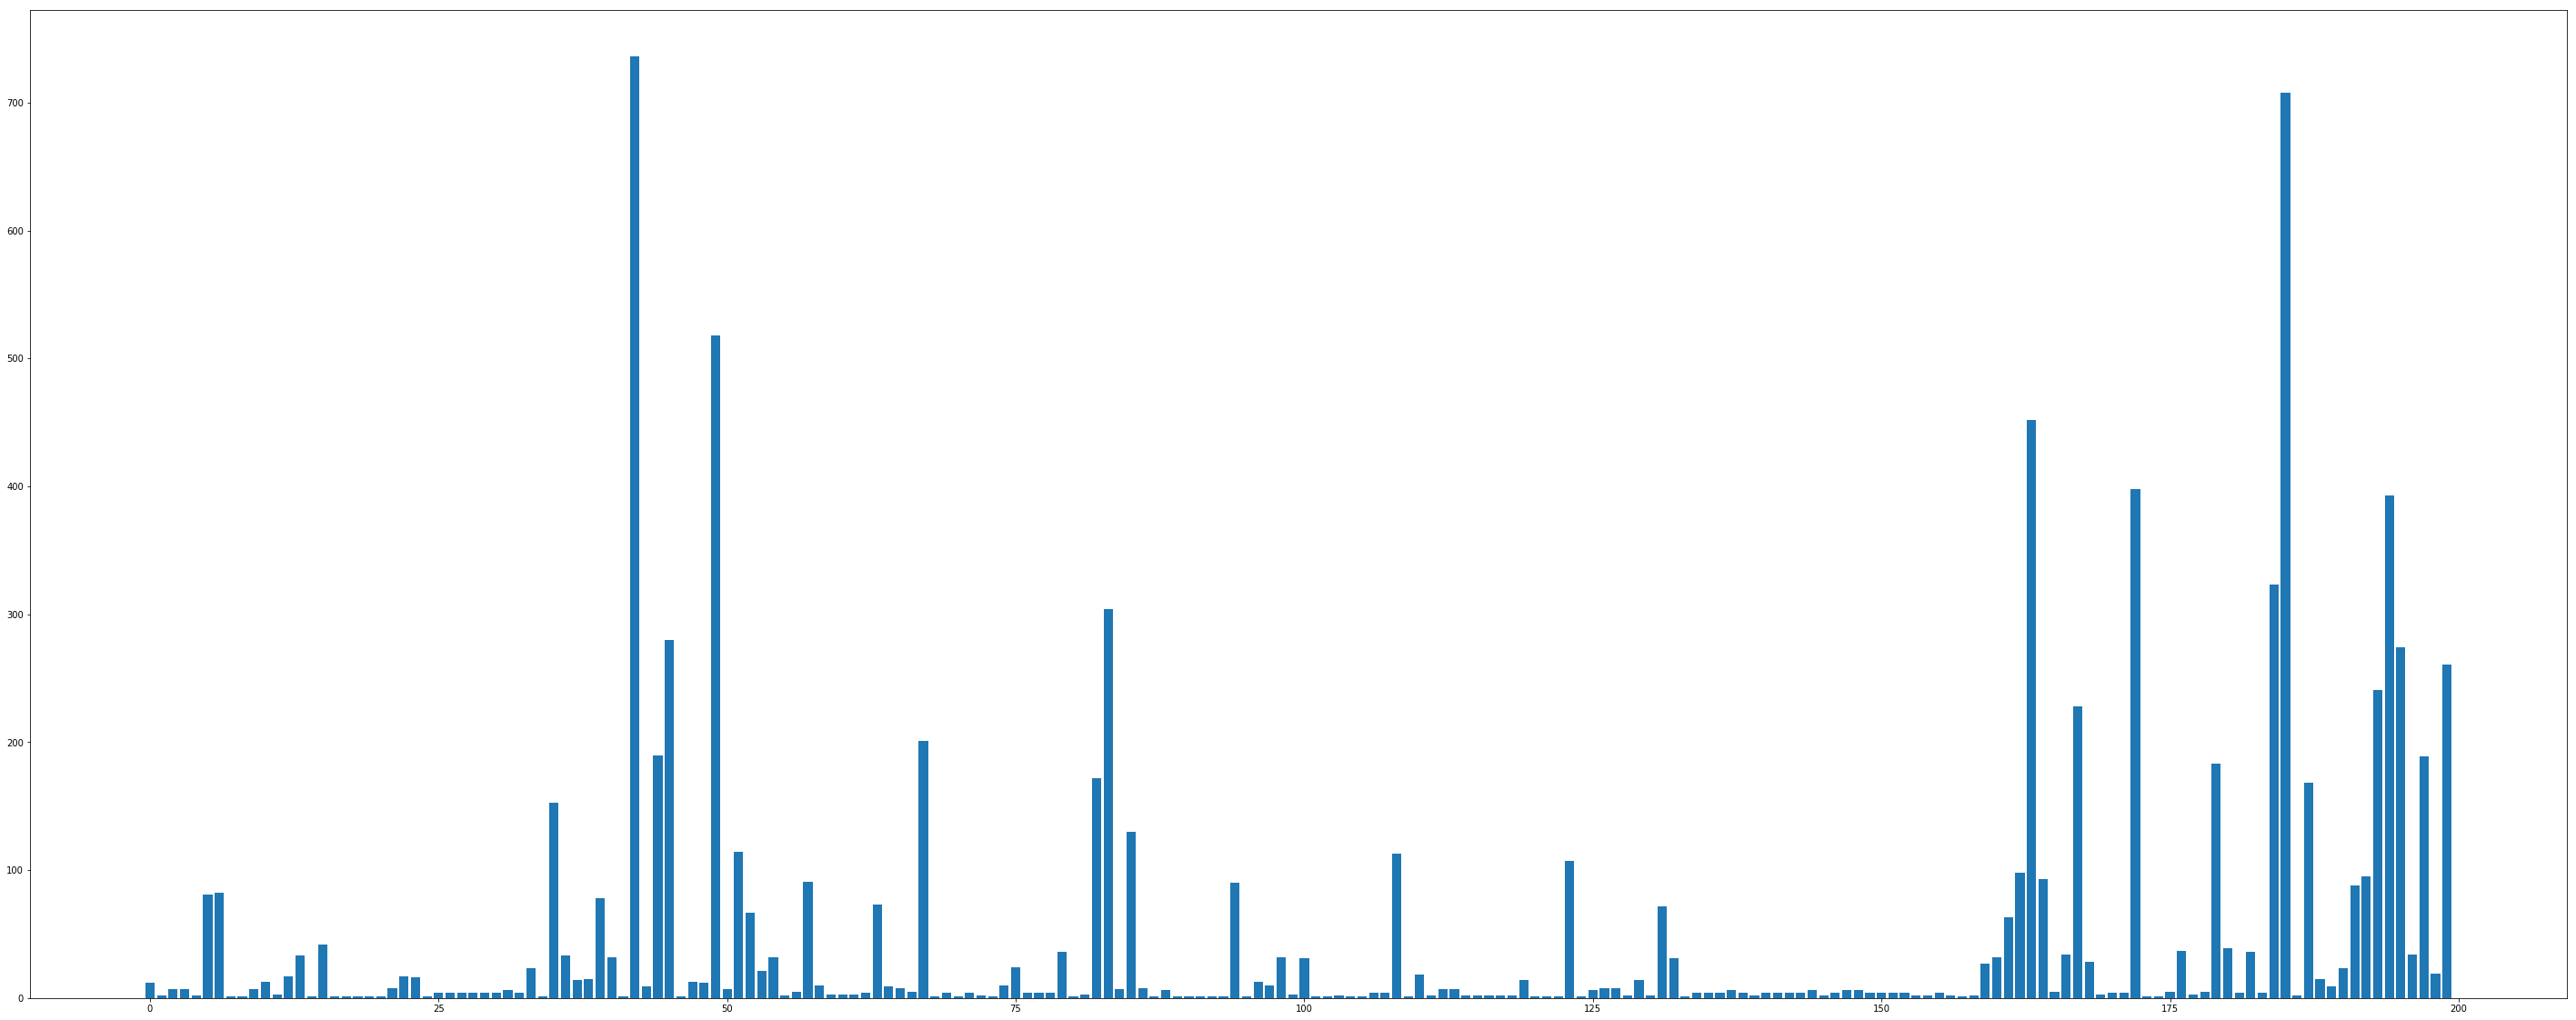

In [108]:
plt.figure(figsize=(50,20))
plt.bar(x=df2.index, height=df2['script_url'])

Distribution of number of script per page

In [109]:
df2['script_url'].describe()

count    200.000000
mean      46.170000
std      108.166358
min        1.000000
25%        2.000000
50%        5.000000
75%       31.250000
max      736.000000
Name: script_url, dtype: float64

In [110]:
df2['country'].describe()

count    200.000000
mean      46.170000
std      108.166358
min        1.000000
25%        2.000000
50%        5.000000
75%       31.250000
max      736.000000
Name: country, dtype: float64

In [111]:
df2[df2['country']==736]

arguments_n_keys  call_id  file_name  func_name  in_iframe  operation  \
42               736      736        736        736        736        736   

    script_col  script_line  script_loc_eval  script_url  symbol  time_stamp  \
42         736          736              736         736     736         736   

    value  value_1000  value_len  location_domain  script_domain  country  \
42    736         736        736              736            736      736   

                                             location  
42  http://www.gap.com/browse/category.do?cid=1096...

In [112]:
df2[df2['script_url']==736]

arguments_n_keys  call_id  file_name  func_name  in_iframe  operation  \
42               736      736        736        736        736        736   

    script_col  script_line  script_loc_eval  script_url  symbol  time_stamp  \
42         736          736              736         736     736         736   

    value  value_1000  value_len  location_domain  script_domain  country  \
42    736         736        736              736            736      736   

                                             location  
42  http://www.gap.com/browse/category.do?cid=1096...

In [113]:
df2['location'].describe()

count                                                   200
unique                                                  200
top       https://www.nab.com.au/about-us/corporate-resp...
freq                                                      1
Name: location, dtype: object

The most page loads are of Facebook in United States and run multiple Google Analytics scripts.

The sample follows some observations from ghostery study but deviates in some cases, which may be due to differences in the way data is collected. The rest of the study "Tracking the Trackers" seems to be based on the data that was collected as a part of the Ghostery extension and may not be easily implemented using the current dataset. The methodology is also not mentioned in the paper which adds to the difficulty of recreating it, especially relating to safe and unsafe values.

The call_id are unique values which shows that unique values are being created. Further work would be required to determine the process of creation of these unique_ids. But since all other columns have repeated values, it suggests that unique identifier is not easily identified. 

In [66]:
df[['country', 'ip_address']].to_csv("/media/pankhuri/MData/safe_dataset.sample/sample/country_analysis.csv")